<a href="https://colab.research.google.com/github/simsekergun/Attention/blob/main/Qc_LSTM_215_315.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Required packages/modules
- `pip install torch`
- `pip install torchvision`
- `pip install GPUtil`

In [1]:
!pip install gputil
!pip install psutil
!pip install humanize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7411 sha256=2dcc8f14197e79595652f4e035dedfaa0bbf14bb53150aa59232755cb1eec2bb
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
Successfully built gputil
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!git clone https://github.com/simsekergun/Attention.git
#%run /content/Attention/Attention.py
%run ./Attention/Attention.py

Cloning into 'Attention'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 28 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (28/28), done.


/content/Attention/Attention.py:1: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
%mkdir ./csv_files_for_paper/
%mkdir ./png_files_for_paper/

In [4]:
ls ./Attention

Attention.py                     Qc_Dataset1.pt  README.md
attnT_add_adamW_relu_relu.ipynb  Qc_Dataset2.pt


In [5]:
Qc_vec1 = torch.load('./Attention/Qc_Dataset1.pt')
Qc_vec2 = torch.load('./Attention/Qc_Dataset2.pt')
Qc_Dataset = torch.cat((Qc_vec1, Qc_vec2), 0)
Qc_Dataset.shape

torch.Size([5748, 579])

In [6]:
class Dataset_freq(Dataset):

    def __init__(self, dataset, n_feature, n_target=419):
        self.dataset = dataset
        self.n_f = n_feature + 8
        self.n_t = n_target

    def __len__(self):
        return self.dataset.shape[0]

    def __getitem__(self, idx):
        x = self.dataset[:, :4]
        x = torch.stack([x for _ in range(25)], dim=1)
        qc = self.dataset[:, 8: self.n_f].reshape(-1, 25, (self.n_f-8)//25)
        x = torch.cat((x, qc), dim=2)
        y = self.dataset[:, self.n_t:]       
        x = x[idx, :, :]
        y = y[idx]
        return x, y

In [7]:
# Splitting into train and test datasets:

train_set, test_set = torch.utils.data.random_split(Qc_Dataset, (Qc_Dataset.shape[0]-500, 500)) 

train_data = torch.stack([train_set[i] for i in range(len(train_set))], dim=0)
test_data = torch.stack([test_set[i] for i in range(len(test_set))], dim=0)

train_data_f1 = Dataset_freq(train_data, n_feature=200)
test_data_f1 = Dataset_freq(test_data, n_feature=200)

In [8]:
# Loading the data through DataLoader:

train_loader = DataLoader(train_data_f1, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data_f1, batch_size=32, shuffle=False)

In [9]:
# Defining an lstm model
lstm_model = recurrent_model(T_length=12, input_dim=25, num_layers=3, num_neurons=512, output_dim=160, model_type='LSTM', bidirectional=False)

eta = 0.001
loss_func = nn.MSELoss()
optimizer = torch.optim.AdamW(lstm_model.parameters(), lr=eta)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 10, gamma=0.5)

In [10]:
# Execute function
mem_report()

CPU RAM Free: 12.5 GB
GPU 0 ... Mem Free: 15106MB / 15109MB | Utilization   0%


In [11]:
# Training the lstm model
start = time.time()
lstm_results = train_network_reg(lstm_model, loss_func, train_loader, test_loader=test_loader, epochs=100, score_funcs={'R^2 score': r2_score}, 
                                device=device, optimizer=optimizer, lr_schedule=scheduler)
stop = time.time()
print('Processing time: %s sec' %(stop-start))

Epoch:   0%|          | 0/100 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Training:   0%|          | 0/164 [00:00<?, ?it/s]

Testing:   0%|          | 0/16 [00:00<?, ?it/s]

Processing time: 2618.9743690490723 sec


In [12]:
# Presenting the performance of the lstm model

lstm_results

,epoch,total time,train loss,test loss,train R^2 score,test R^2 score
0,0,26.898778,3.802520,1.504904,-1.731998,-0.001534
1,1,53.168024,1.409159,1.525153,-0.012130,-0.015383
2,2,79.354613,1.407658,1.517542,-0.010824,-0.011148
3,3,104.983257,1.421326,1.527303,-0.020576,-0.018018
4,4,131.327444,1.423692,1.531707,-0.022705,-0.019569
...,...,...,...,...,...,...
95,95,2440.707299,0.789851,0.780089,0.430780,0.481336
96,96,2465.721144,0.780129,0.773503,0.437871,0.485783
97,97,2490.795307,0.781674,0.769926,0.436787,0.488375
98,98,2515.971465,0.773731,0.765462,0.442266,0.490947


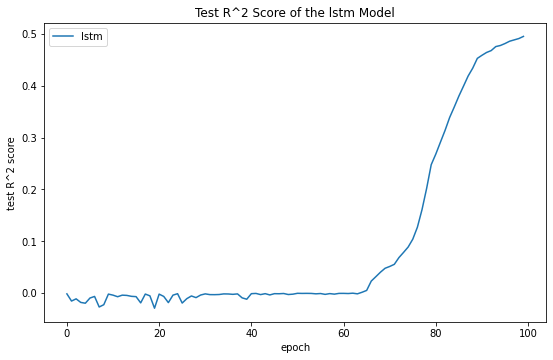

In [13]:
# Plotting the accuracy of the fully connected model:
sns.lineplot(x='epoch', y='test R^2 score', data=lstm_results, label='lstm')
plt.title('Test R^2 Score of the lstm Model')
plt.gcf().set_size_inches(9, 5.5)
plt.show()

In [14]:
lstm_results.to_csv('./csv_files_for_paper/lstm_results.csv',index=False)

In [15]:
mem_report()

CPU RAM Free: 10.5 GB
GPU 0 ... Mem Free: 13651MB / 15109MB | Utilization  10%


In [16]:
# used GPU memory: 1.457 GB
# used RAM: 2.91 GB
# training: 61 minutes (3622.8 seconds)
# training loss = 0.055771   R^2 = 0.961719	
# test loss = 0.052013	     R^2 = 0.963052

15106-13649

1457